# 🚢 Dự Án: Dự Đoán Tỷ Lệ Sống Sót Trên Tàu Titanic

## 🎯 Mục tiêu:
Xây dựng mô hình học máy để dự đoán khả năng sống sót của hành khách trên tàu Titanic dựa trên các thông tin như:
- Giới tính
- Tuổi
- Hạng vé
- Số người đi cùng
- Cảng lên tàu, v.v.

## 📦 Dữ liệu:
Tập dữ liệu hành khách trên Titanic được cung cấp bởi [Kaggle Titanic Dataset](https://www.kaggle.com/c/titanic).

## 🧩 Các bước chính:
1. Khám phá và phân tích dữ liệu (EDA)
2. Tiền xử lý dữ liệu (xử lý dữ liệu thiếu, mã hóa biến phân loại, chuẩn hóa,...)
3. Huấn luyện mô hình dự đoán
4. Đánh giá hiệu suất mô hình
5. Đưa ra dự đoán và trực quan hóa kết quả

---

> **Mục tiêu cuối cùng:** Dự đoán chính xác hành khách nào có khả năng sống sót, giúp hiểu rõ hơn vai trò của từng đặc trưng trong việc sinh tồn trên con tàu định mệnh Titanic.



In [94]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [95]:
data_df = pd.read_csv('train.csv')

In [96]:
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [97]:
test_df = pd.read_csv('test.csv')

In [98]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S


In [99]:
data_df.set_index(data_df.PassengerId, inplace = True)

In [100]:
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [101]:
data_df.drop('PassengerId',axis=1, inplace=True)

In [102]:
data_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
test_df = pd.read_csv('test.csv', index_col = 'PassengerId')

In [104]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## 🧠 Tìm Đặc Trưng của Tập Dữ Liệu <a id="feature-types"></a>

### 🔹 Các đặc trưng phân loại (Categorical Features):
- `Sex`
- `Pclass`
- `Sibsp`
- `Parch`
- `Embarked`

### 🔹 Các đặc trưng dạng số (Numerical Features):
- `Age`
- `Fare`

### 🔹 Đặc trưng dạng hỗn hợp (Mixed Types):
- `Ticket` *(có cả chữ và số, khó xử lý trực tiếp)*


In [105]:
data_df.info() # can phai fix mising data

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [106]:
data_df['Survived'] = data_df['Survived'].astype('category')

In [107]:
features = ['Sex', 'Pclass' , 'SibSp', 'Parch', 'Embarked']
def convert(data_df , features):
    for i in features:
        data_df[i] = data_df[i].astype('category')
convert(data_df, features)
convert(test_df, features)     

In [108]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


## 📈 Phân bố Dữ liệu <a id="data-distribution"></a>

### 🧩 Mục tiêu:
Phân tích cách các biến trong tập dữ liệu được phân bố, bao gồm cả biến số (numerical) và biến phân loại (categorical).

### 🔍 Một số nội dung thường kiểm tra:
- Phân bố giá trị trong từng cột
- Tần suất xuất hiện của các nhãn trong biến phân loại (`Sex`, `Embarked`, `Pclass`, ...)
- Histogram hoặc biểu đồ phân bố cho biến số (`Age`, `Fare`, ...)
- Kiểm tra dữ liệu thiếu (missing values)


In [109]:
data_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [110]:
data_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## 📊 EDA (Khám phá Dữ liệu) <a id="eda"></a>

### 🔗 Phân tích mối tương quan giữa các đặc trưng phân loại (Categorical Features)

- **Các đặc trưng phân loại**:
  - `Survived`
  - `Sex`
  - `Pclass`
  - `Sibsp`
  - `Embarked`
  
- **Biến mục tiêu (Target variable)**:  
  - `Survived`


In [111]:
data_df['Survived'].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [112]:
data_df['Survived'].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


### 🧠 Nhận xét:
- Phần lớn hành khách **không sống sót**, chiếm khoảng **61.6%**.
- Chỉ có **38.4%** hành khách sống sót, cho thấy đây là một bài toán **mất cân bằng nhãn (imbalanced dataset)**.
- Điều này cần được lưu ý trong quá trình huấn luyện mô hình, vì các thuật toán học máy có thể thiên lệch nếu không xử lý phù hợp.



#### Sex

In [113]:
data_df['Sex'].value_counts().to_frame()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='count'>

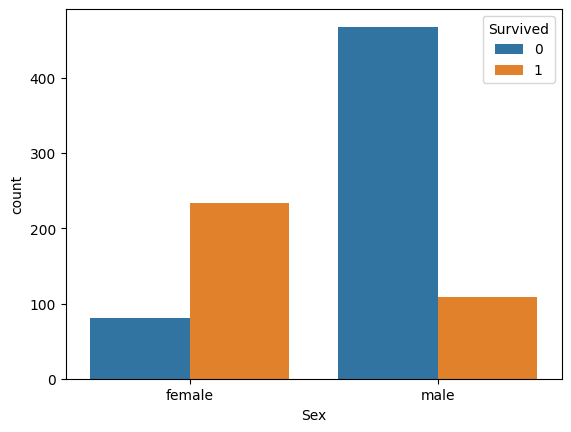

In [114]:
sns.countplot(data= data_df, x = 'Sex', hue = 'Survived')

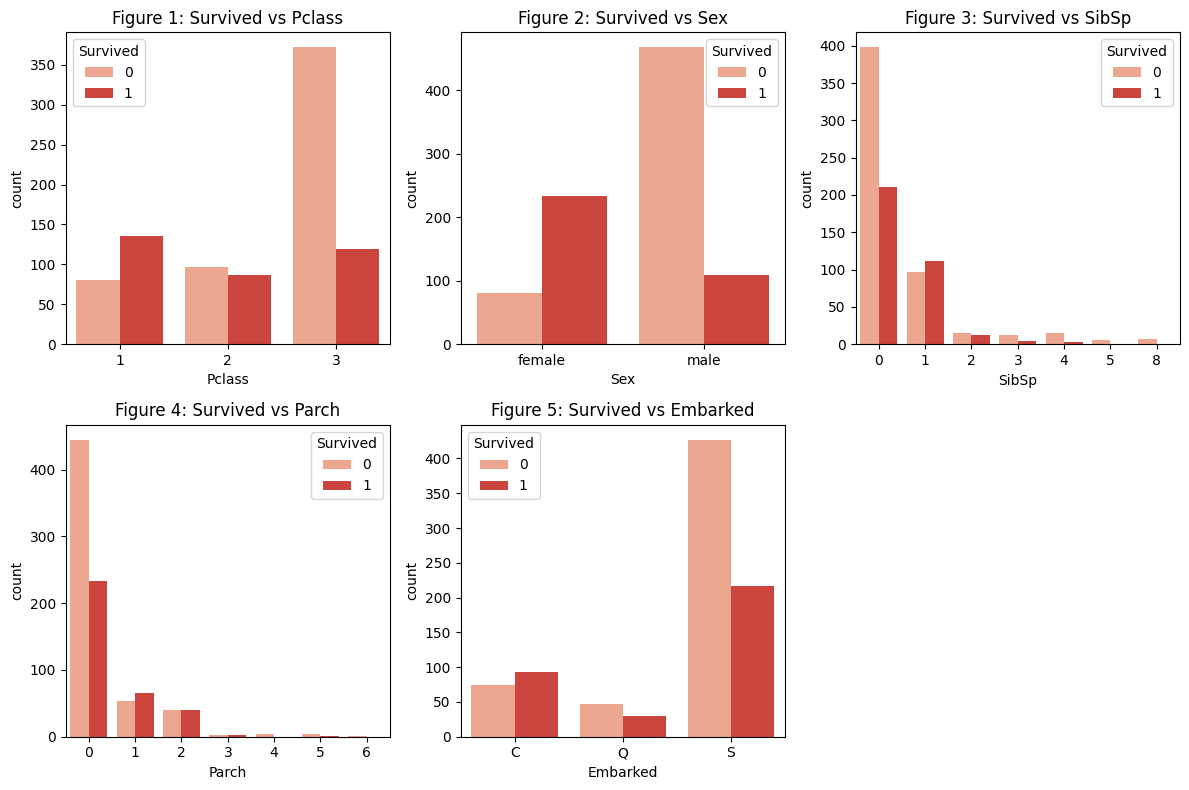

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = [" Pclass", "Sex ", "SibSp", " Parch ", " Embarked"]
cols = [col.strip() for col in cols]  # loại bỏ khoảng trắng

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

for idx, col in enumerate(cols):
    row = idx // n_cols
    col_idx = idx % n_cols
    sns.countplot(data=data_df, x=col, hue="Survived", palette="Reds", ax=ax[row, col_idx])
    ax[row, col_idx].set_title(f"Figure {idx + 1}: Survived vs {col}")
    ax[row, col_idx].legend(title="Survived")

if len(cols) < n_rows * n_cols:
    for i in range(len(cols), n_rows * n_cols):
        row = i // n_cols
        col_idx = i % n_cols
        ax[row, col_idx].axis('off')

plt.tight_layout()
plt.show()


## 📊 Phân Tích Biểu Đồ Phân Bố Tỷ Lệ Sống Sót

Dựa trên các biểu đồ phân tích tỷ lệ sống sót theo các đặc trưng phân loại (`Sex`, `Pclass`, `Embarked`, `SibSp`, `Parch`), ta rút ra được một số nhận xét quan trọng như sau:

### 🔹 1. Giới tính (`Sex`)
- **Tỷ lệ sống sót của nữ cao hơn nam** một cách rõ rệt.
- Điều này phản ánh chính sách "phụ nữ và trẻ em được ưu tiên lên thuyền cứu hộ" trong vụ đắm tàu Titanic.

### 🔹 2. Hạng vé (`Pclass`)
- **Hành khách hạng nhất (1st class) có tỷ lệ sống sót cao nhất**.
- Hành khách hạng 3 (3rd class) có tỷ lệ sống sót thấp nhất, cho thấy sự chênh lệch về cơ hội sống sót theo điều kiện kinh tế.

### 🔹 3. Cảng lên tàu (`Embarked`)
- **Hành khách lên tàu tại cảng Southampton (S)** có **số lượng đông nhất**, nhưng tỷ lệ sống sót **thấp hơn** so với các cảng còn lại (Cherbourg - C, Queenstown - Q).
- Trong khi đó, hành khách từ cảng Cherbourg (C) có tỷ lệ sống sót tương đối cao.

### 📌 Kết luận:
Các đặc trưng như **giới tính, hạng vé và cảng lên tàu** có ảnh hưởng rõ rệt đến khả năng sống sót của hành khách. Điều này rất quan trọng khi xây dựng mô hình dự đoán.



### 3.EDA for Numberical feartures 
- `Age` , `Fare`  

<Axes: xlabel='Age', ylabel='Count'>

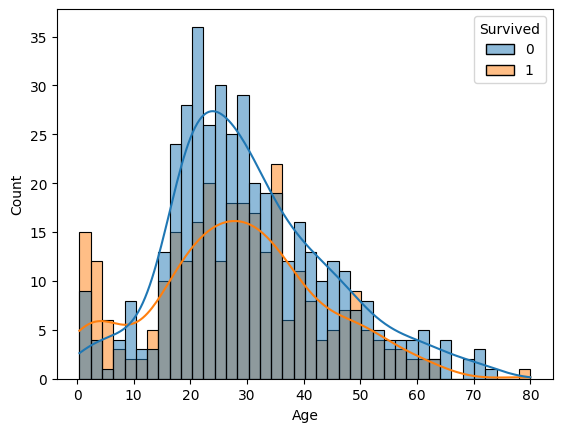

In [116]:
sns.histplot(data= data_df, bins = 40 , x = 'Age', hue = 'Survived', kde= True)

- Tỉ lệ sống sót của trẻ em cao hơn độ tuổi còn lại 
- Độ tuổi giao động từ 18-40 có tỉ lệ tử vong cao nhất

In [117]:
data_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

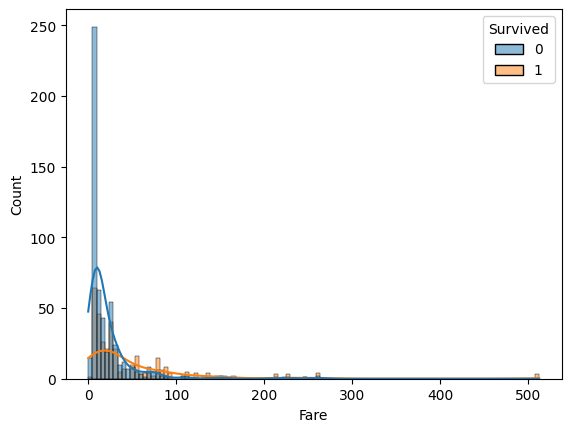

In [118]:
sns.histplot(data = data_df, x= 'Fare', hue = 'Survived', kde = True)

In [119]:
pd.qcut(data_df['Fare'], 4)

PassengerId
1       (-0.001, 7.91]
2      (31.0, 512.329]
3       (7.91, 14.454]
4      (31.0, 512.329]
5       (7.91, 14.454]
            ...       
887     (7.91, 14.454]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (14.454, 31.0]
891     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [120]:
data_df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

In [121]:
data_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### 📐 Feature Engineering
*Creating and transforming features to improve model performance.*

---

### ⚠️ Data Warnings
*Issues such as missing values, inconsistent types, or outliers are addressed here.*


In [122]:
print(data_df.columns.tolist())


['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [123]:
data_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [124]:
import re
import pandas as pd

def chuyen_tu(name):
    if pd.isna(name):
        return "Unknown"
    p = re.compile(r",([\w\s]+)\.")
    match = p.search(name)
    if match:
        return match.group(1).strip()
    else:
        return "Unknown"

data_df['Title'] = data_df['Name'].apply(lambda name : chuyen_tu(name))    


In [125]:
test_df['Title'] = test_df['Name'].apply(lambda name : chuyen_tu(name))

In [126]:
print(test_df.columns.tolist())


['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title']


In [127]:
test_df['Title'].value_counts()

Title
Mr         480
Miss       156
Mrs        144
Master      42
Col          4
Rev          4
Ms           2
Dr           2
Dona         2
Unknown      2
Name: count, dtype: int64

In [128]:
titles = [
    "Dr", "Rev", "Col", "Mlle", "Major", "Ms", "Mme",
    "Don", "Lady", "Sir", "Capt", "the Countess", "Jonkheer"
]

def group_title(title):
    if title in ['Mr', 'Miss', 'Mrs', 'Master']:
        return title
    elif title == 'Ms':
        return 'Miss'
    elif title in titles:
        return "Other"
    else:
        return "Other"

data_df['Title'] = data_df['Title'].apply(group_title)
test_df['Title'] = test_df['Title'].apply(group_title)

In [129]:
data_df['Title'].value_counts()

Title
Mr        517
Miss      183
Mrs       125
Master     40
Other      26
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='Count'>

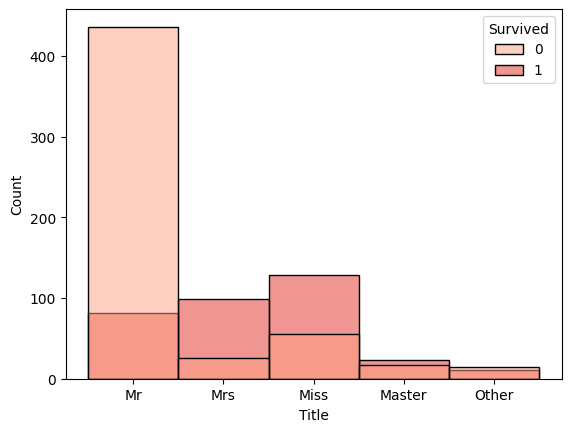

In [130]:
sns.histplot(data= data_df , x = 'Title', hue = 'Survived', palette = "Reds")

In [131]:
# 1. Ép kiểu an toàn sang số (với lỗi thì thành NaN)
test_df['Parch'] = pd.to_numeric(test_df['Parch'], errors='coerce')
test_df['SibSp'] = pd.to_numeric(test_df['SibSp'], errors='coerce')

# 2. Loại bỏ dòng có NaN sau khi ép kiểu
test_df = test_df.dropna(subset=['Parch', 'SibSp'])

# 3. Ép sang int
test_df['Parch'] = test_df['Parch'].astype(int)
test_df['SibSp'] = test_df['SibSp'].astype(int)
test_df['Family_size'] = test_df['Parch'] + test_df['SibSp']

In [132]:
# 1. Ép kiểu an toàn sang số (với lỗi thì thành NaN)
data_df['Parch'] = pd.to_numeric(data_df['Parch'], errors='coerce')
data_df['SibSp'] = pd.to_numeric(data_df['SibSp'], errors='coerce')

# 2. Loại bỏ dòng có NaN sau khi ép kiểu
data_df = data_df.dropna(subset=['Parch', 'SibSp'])

# 3. Ép sang int
data_df['Parch'] = data_df['Parch'].astype(int)
data_df['SibSp'] = data_df['SibSp'].astype(int)
data_df['Family_size'] = data_df['Parch'] + data_df['SibSp']

In [133]:
print(test_df.columns.tolist())


['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Family_size']


<Axes: xlabel='Family_size', ylabel='count'>

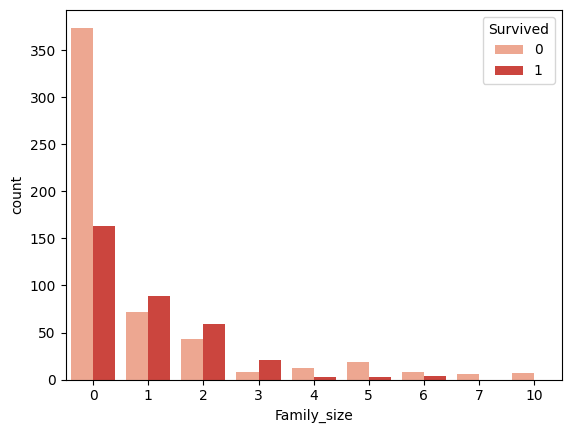

In [134]:
sns.countplot(data = data_df, x = 'Family_size', hue = 'Survived', palette = 'Reds')

In [135]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    category
 1   Pclass       891 non-null    category
 2   Name         891 non-null    object  
 3   Sex          891 non-null    category
 4   Age          714 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    object  
 10  Embarked     889 non-null    category
 11  Title        891 non-null    object  
 12  Family_size  891 non-null    int64   
dtypes: category(4), float64(2), int64(3), object(4)
memory usage: 73.6+ KB


In [136]:
data_df['Category'] = pd.cut(data_df['Family_size'], bins = [0, 1, 4 , 6 , 20 ], labels= ['Solo','Small', 'Medium', 'Large'])
test_df['Category'] = pd.cut(test_df['Family_size'], bins = [0, 1, 4 , 6 , 20 ], labels= ['Solo','Small', 'Medium', 'Large'])

## Data Wrangling

In [154]:
nums_features = ['Age', 'Fare']
cat_features = ['Sex', 'Embarked', 'Pclass', 'Title', 'Family_size']
features_sum =  nums_features + cat_features

In [155]:
print(features_sum)

['Age', 'Fare', 'Sex', 'Embarked', 'Pclass', 'Title', 'Family_size']


In [139]:
# hien thi missing values 
def missing_check(data_df, features_sum):
    for col  in features_sum:
        missing_values = data_df[col].isnull().sum()
        if missing_values > 0:
            print(f"Cols:{col} has {missing_values} missing data")
# goi de quy 1 lan nua 
missing_check(data_df, features_sum)       
missing_check(test_df, features_sum) 

Cols:Age has 177 missing data
Cols:Embarked has 2 missing data
Cols:Age has 177 missing data
Cols:Age has 172 missing data
Cols:Fare has 2 missing data
Cols:Age has 172 missing data


### Fill missing values 

- Tinh `trung binh` tuoi theo cot thay the vao cho missing values

In [140]:
data_df['Age'] = data_df['Age'].astype(float)
median_df = data_df.groupby(['Sex', 'Pclass']).median(numeric_only=True)
median_df

C:\Users\TRAN ANH DUNG\AppData\Local\Temp\ipykernel_5636\561171473.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_df = data_df.groupby(['Sex', 'Pclass']).median(numeric_only=True)


Age  SibSp  Parch      Fare  Family_size
Sex    Pclass                                           
female 1       35.0    0.0    0.0  82.66455          1.0
       2       28.0    0.0    0.0  22.00000          1.0
       3       21.5    0.0    0.0  12.47500          1.0
male   1       40.0    0.0    0.0  41.26250          0.0
       2       30.0    0.0    0.0  13.00000          0.0
       3       25.0    0.0    0.0   7.92500          0.0

In [141]:
data_df['Age'] = data_df['Age'].fillna(
    data_df.groupby(['Sex', 'Pclass'])['Age'].transform('mean')
)

C:\Users\TRAN ANH DUNG\AppData\Local\Temp\ipykernel_5636\1009847273.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_df.groupby(['Sex', 'Pclass'])['Age'].transform('mean')


In [142]:
data_df['Age']

PassengerId
1      22.00
2      38.00
3      26.00
4      35.00
5      35.00
       ...  
887    27.00
888    19.00
889    21.75
890    26.00
891    32.00
Name: Age, Length: 891, dtype: float64

In [143]:
data_df['Age'] = pd.to_numeric(data_df['Age'], errors='coerce')

data_df['Age'] = data_df['Age'].fillna(
    data_df.groupby(['Sex', 'Pclass'])['Age'].transform('mean')
)

C:\Users\TRAN ANH DUNG\AppData\Local\Temp\ipykernel_5636\1628416058.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_df.groupby(['Sex', 'Pclass'])['Age'].transform('mean')


In [144]:
test_df['Age'] = pd.to_numeric(test_df['Age'], errors='coerce')

test_df['Age'] = test_df['Age'].fillna(
    test_df.groupby(['Sex', 'Pclass'])['Age'].transform('mean')
)

C:\Users\TRAN ANH DUNG\AppData\Local\Temp\ipykernel_5636\1917494967.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_df.groupby(['Sex', 'Pclass'])['Age'].transform('mean')


In [145]:
test_df['Age']

PassengerId
892     34.500000
893     47.000000
894     62.000000
895     27.000000
896     22.000000
          ...    
1305    24.525104
1306    39.000000
1307    38.500000
1308    24.525104
1309    24.525104
Name: Age, Length: 836, dtype: float64

In [146]:
missing_check(test_df, features)
missing_check(data_df, features)

Cols:Embarked has 2 missing data


In [156]:
x = data_df[features_sum]
y = data_df['Survived']
x_test = test_df[features_sum]

In [157]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

# Cột số & phân loại bạn cung cấp
nums_features = ['Age', 'Fare']
cat_features = ['Sex', 'Embarked', 'Pclass', 'Title', 'Family_size']

# Pipeline xử lý cột số
nums_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline xử lý cột phân loại
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Gộp tất cả vào ColumnTransformer
preprocess = ColumnTransformer(transformers=[
    ('num', nums_transformer, nums_features),
    ('cat', cat_transformer, cat_features)
])


In [158]:
preprocess.fit(x)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Embarked', 'Pclass', 'Title',
                                  'Family_size'])])

In [153]:
print(x.columns)


Index(['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked'], dtype='object')


In [159]:
x_test = preprocess.transform(x_test)

In [160]:
x_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5016 stored elements and shape (836, 24)>

# 🚀 Huấn Luyện Mô Hình Học Máy

## 1. 📦 Import thư viện

```python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [161]:
from sklearn.model_selection import train_test_split
x_train, x_val , y_train, y_val = train_test_split(x, y , test_size = 0.2)

In [162]:
x_train.shape

(712, 7)